In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import \
     (cross_validate,
      KFold)
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
import random
from sklearn.linear_model import Ridge

In [4]:

random_seed = 113

np.random.seed(random_seed)
random.seed(random_seed)

In [5]:
df = pd.read_csv('https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/DTSC2301_Project2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RelCompactness   768 non-null    float64
 1   SurfaceArea      768 non-null    float64
 2   WallArea         768 non-null    float64
 3   RoofArea         768 non-null    float64
 4   OverallHgt       768 non-null    float64
 5   Orientation      768 non-null    float64
 6   GlazingArea      768 non-null    float64
 7   GlazingAreaDist  768 non-null    float64
 8   HeatingLoad      768 non-null    float64
dtypes: float64(9)
memory usage: 91.3 KB


In [6]:
# we have rows where all features are null, these have to be removed
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RelCompactness   768 non-null    float64
 1   SurfaceArea      768 non-null    float64
 2   WallArea         768 non-null    float64
 3   RoofArea         768 non-null    float64
 4   OverallHgt       768 non-null    float64
 5   Orientation      768 non-null    float64
 6   GlazingArea      768 non-null    float64
 7   GlazingAreaDist  768 non-null    float64
 8   HeatingLoad      768 non-null    float64
dtypes: float64(9)
memory usage: 60.0 KB


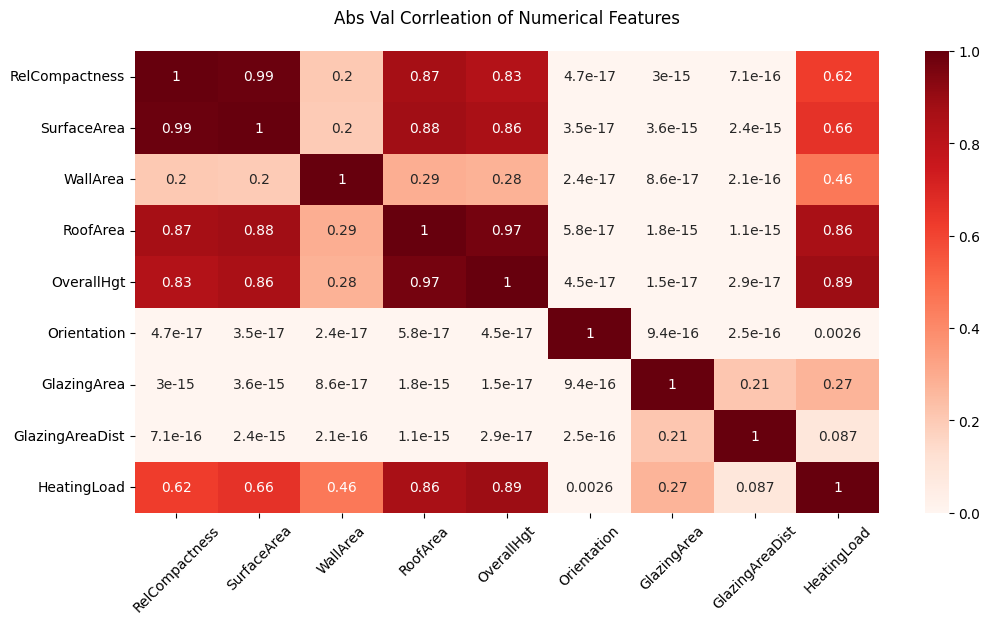

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.abs(df.corr(numeric_only=True)), cmap="Reds", annot=True)
plt.title("Abs Val Corrleation of Numerical Features", pad=20)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Disutrbution of Heating Load Values')

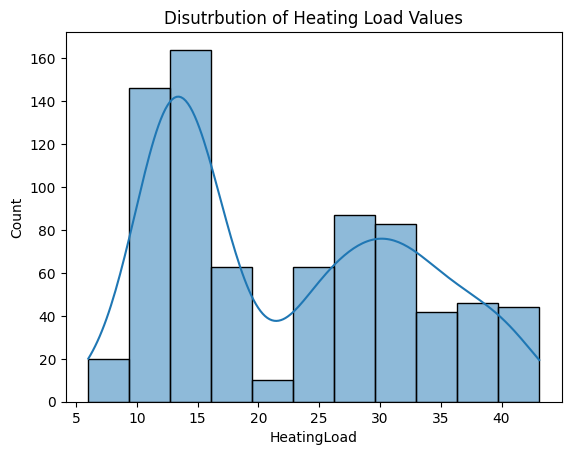

In [8]:
sns.histplot(df["HeatingLoad"], kde=True)
plt.title("Disutrbution of Heating Load Values")

# Notice that our response variable does not follow a gaussian distribution.

In [9]:
# making a base model that uses all columns with no transformations (unnecessary code)

# X = df.drop(columns=['HeatingLoad', "Orientation"])
# y = df['HeatingLoad']


# naive_model = sm.OLS(y, sm.add_constant(X)).fit()

# wrapper_model = sklearn_sm(sm.OLS, MS(X.columns))

# cv = KFold(n_splits=8, shuffle=True, random_state=113) # define cv object
# cv_results = cross_validate(wrapper_model, X, y, cv=cv)
# cv_err = np.mean(cv_results['test_score'])
# print(cv_err)

# y_pred = naive_model.predict(sm.add_constant(X))

# display = PredictionErrorDisplay.from_predictions(y_pred = y_pred, y_true = y)
# plt.title("Predicted Values V. Residuals")
# display


Text(0.5, 0.98, 'Predicted Value V. Residuals with Transformation on Reponse Variable')

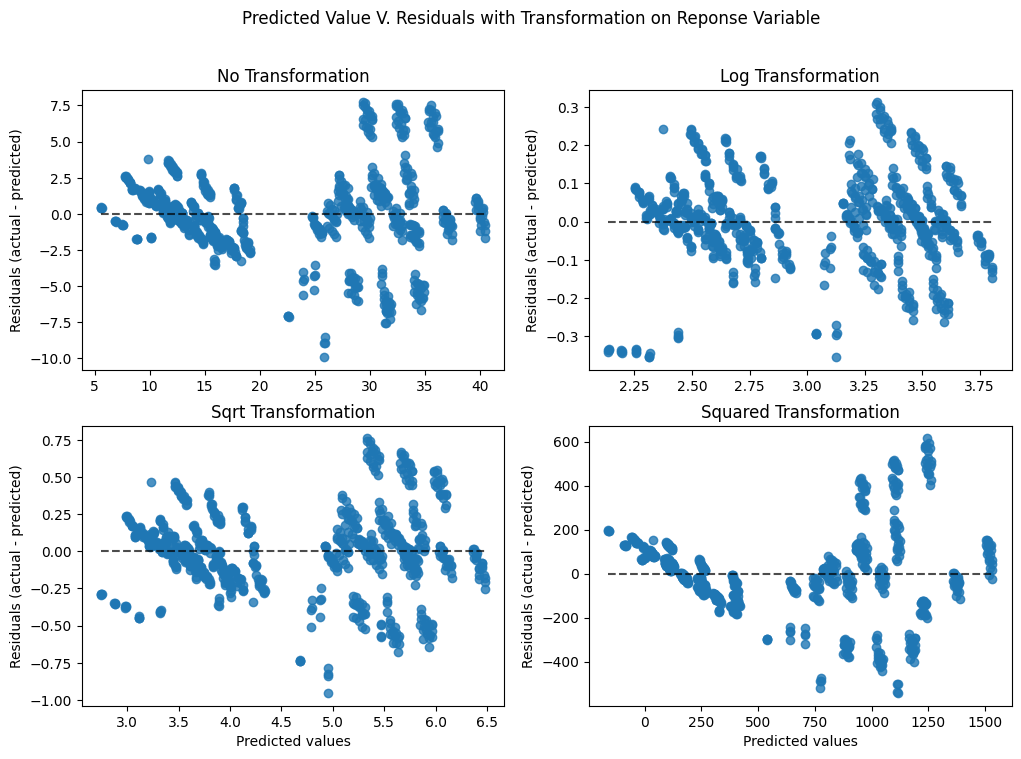

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
X = df.drop(columns=["HeatingLoad"])
y = df["HeatingLoad"]

y = df['HeatingLoad']
naive_model = sm.OLS(y, sm.add_constant(X)).fit()
y_pred = naive_model.predict(sm.add_constant(X))
PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred, ax=axes[0][0])
axes[0][0].set_title("No Transformation")
axes[0][0].set_xlabel("")

y = np.log(df['HeatingLoad'])
naive_model = sm.OLS(y, sm.add_constant(X)).fit()
y_pred = naive_model.predict(sm.add_constant(X))
PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred, ax=axes[0][1])
axes[0][1].set_title("Log Transformation")
axes[0][1].set_xlabel("")

y = np.sqrt(df['HeatingLoad'])
naive_model = sm.OLS(y, sm.add_constant(X)).fit()
y_pred = naive_model.predict(sm.add_constant(X))
PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred, ax=axes[1][0])
axes[1][0].set_title("Sqrt Transformation")

y = df['HeatingLoad']**2
naive_model = sm.OLS(y, sm.add_constant(X)).fit()
y_pred = naive_model.predict(sm.add_constant(X))
PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred, ax=axes[1][1])
axes[1][1].set_title("Squared Transformation")

plt.suptitle("Predicted Value V. Residuals with Transformation on Reponse Variable")

#### PART B

In [11]:
# we are told to treat orientation as categorical
for orient in df["Orientation"].unique():
  df[f"{orient}_Orientation"] = np.where(df["Orientation"] == orient, 1, 0)
df = df.drop(columns=["Orientation"])
df.columns

Index(['RelCompactness', 'SurfaceArea', 'WallArea', 'RoofArea', 'OverallHgt',
       'GlazingArea', 'GlazingAreaDist', 'HeatingLoad', '2.0_Orientation',
       '3.0_Orientation', '4.0_Orientation', '5.0_Orientation'],
      dtype='object')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     378.5
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          1.27e-286
Time:                        13:13:05   Log-Likelihood:                -2176.5
No. Observations:                 768   AIC:                             4375.
Df Residuals:                     757   BIC:                             4426.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      211.9542     14.096     15.036      0.000     184.282     239.626
RelCompactness            -145.9437     11.179    -13.055      0.000    -167.890    -123.997
WallArea                    -0.1005      0.011     -8.949      0.000      -0.123      -0.078
RoofArea                    -0.5250      0.027    -19.585      0.000      -0.578      -0.472
2.0_Orientation             53.1650      4.009     13.262      0.000      45.295      61.035
3.0_Orientation             53.1757      4.009     13.265      0.000      45.306      61.045
4.0_Orientation             52.5501      4.009     13.109      0.000      44.680      60.420
5.0_Orientation             53.0635      4.009     13.237      0.000      45.194      60.933
GlazingAreaDist              0.5684      0.097      5.888      0.000       0.379       0.758
2.0_Orientation_WallArea    -0.0257      0.007     -3.903      0.000      -0.039      -0.013
3.0_Orientation_WallArea    -0.0255      0.007     -3.875      0.000      -0.038      -0.013
4.0_Orientation_WallArea    -0.0239      0.007     -3.634      0.000      -0.037      -0.011
5.0_Orientation_WallArea    -0.0255      0.007     -3.872      0.000      -0.038      -0.013
==============================================================================
Omnibus:                       17.585   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.765
Skew:                           0.150   Prob(JB):                     3.44e-07
Kurtosis:                       3.916   Cond. No.                     1.45e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.81e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

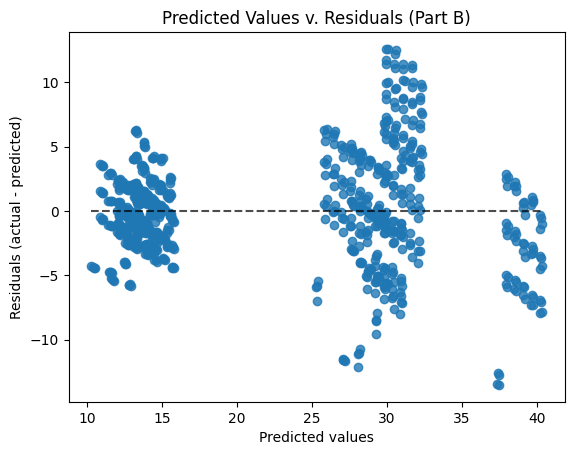

In [12]:
X = df[["RelCompactness", "WallArea", "RoofArea", "2.0_Orientation", "3.0_Orientation",
        "4.0_Orientation", "5.0_Orientation", "GlazingAreaDist"]].copy()
y = df["HeatingLoad"]


X["2.0_Orientation_WallArea"] = X["2.0_Orientation"] * X["WallArea"]
X["3.0_Orientation_WallArea"] = X["3.0_Orientation"] * X["WallArea"]
X["4.0_Orientation_WallArea"] = X["4.0_Orientation"] * X["WallArea"]
X["5.0_Orientation_WallArea"] = X["5.0_Orientation"] * X["WallArea"]

model = sm.OLS(y, sm.add_constant(X)).fit()

y_pred = model.predict(sm.add_constant(X))
display = PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred)
plt.title("Predicted Values v. Residuals (Part B)")

model.summary()

#### Part C & D

In [13]:

from sklearn.model_selection import cross_val_score

X = df.drop(columns=['HeatingLoad'])
y = df["HeatingLoad"]

def processSubset(feature_set) -> dict:

    poly = PolynomialFeatures(degree=2) 
    X_poly = poly.fit_transform(X[feature_set])  

    poly_feature_names = poly.get_feature_names_out(feature_set) # get the column names of polynomial features
    poly_df = pd.DataFrame(X_poly, columns=poly_feature_names) # convert to df to take advantage of column names

    ridge = Ridge(alpha=0.2)
    ridge.fit(poly_df, y)

    cv = KFold(n_splits=8, shuffle=True, random_state=113) # define cv object with our given random seed

    # do cross validation using RMSE as objective measurement
    cv_results = cross_val_score(ridge, poly_df, y, cv=cv, scoring="neg_root_mean_squared_error")
    cv_err = -np.mean(cv_results)

    # ridge does not support aic, bic, and adj r^2 out-of-the-box
    aic = df.shape[0] * np.log((np.sum((y - ridge.predict(poly_df))**2)/df.shape[0])) + 2 * len(ridge.coef_)
    bic = df.shape[0] * np.log((np.sum((y - ridge.predict(poly_df))**2)/df.shape[0])) + len(ridge.coef_) * np.log(df.shape[0])
    adj_r2 = 1 - ((1 - ridge.score(poly_df, y)) * (df.shape[0] - 1) / (df.shape[0] - poly_df.shape[1] - 1))
    

    return {"model": ridge,
            "features_used": feature_set,
            "AvgRMSE": cv_err,
            "AIC": aic,
            "BIC": bic,
            "Samp_AdjRSq":adj_r2,
            "Rsq": ridge.score(poly_df, y)
            }


def getBest(k):
    results = [] # list of dictionary results from processSubset()

    for combo in itertools.combinations(X, k):
        results.append(processSubset(list(combo)))

    models = pd.DataFrame(results)

    # choose the model with the smallest 8-fold CV Score
    best_model = models.loc[models['AvgRMSE'].argmin()]

    # return the best model, along with some other useful information about the model
    return best_model

best_models = pd.DataFrame()
for i in range(1, 12):
  print(i)
  best_models = pd.concat([best_models, getBest(i)], axis=1)

best_models = best_models.T
best_models.index = range(1, 12)
best_models

1
2
3
4
5
6
7
8
9
10
11


,model,features_used,AvgRMSE,AIC,BIC,Samp_AdjRSq,Rsq
1,Ridge(alpha=0.2),[RoofArea],4.552581,2331.022027,2344.953397,0.796183,0.79698
2,Ridge(alpha=0.2),"[RoofArea, GlazingArea]",3.559817,1950.726478,1978.589216,0.876262,0.87723
3,Ridge(alpha=0.2),"[WallArea, OverallHgt, GlazingArea]",2.648947,1501.73884,1548.176738,0.931393,0.932287
4,Ridge(alpha=0.2),"[RelCompactness, SurfaceArea, WallArea, Glazin...",2.222939,1234.438006,1304.094852,0.951867,0.952809
5,Ridge(alpha=0.2),"[RelCompactness, SurfaceArea, WallArea, Overal...",1.903965,996.339279,1093.858863,0.964966,0.965925
6,Ridge(alpha=0.2),"[RelCompactness, SurfaceArea, WallArea, Overal...",1.800414,917.086762,1047.112874,0.968678,0.969821
7,Ridge(alpha=0.2),"[RelCompactness, SurfaceArea, WallArea, RoofAr...",1.795462,929.502729,1096.679159,0.968482,0.969962
8,Ridge(alpha=0.2),"[RelCompactness, SurfaceArea, WallArea, RoofAr...",1.802039,944.582045,1153.552583,0.968211,0.970076
9,Ridge(alpha=0.2),"[RelCompactness, SurfaceArea, WallArea, RoofAr...",1.811284,962.932636,1218.341071,0.967833,0.97014
10,Ridge(alpha=0.2),"[RelCompactness, SurfaceArea, WallArea, RoofAr...",1.823402,984.040565,1290.530687,0.967367,0.970175


#### Getting the model summary from Ridge Regression Model

In [14]:
X = df[best_models.loc[6, "features_used"]]
y = df["HeatingLoad"]

poly = PolynomialFeatures(degree=2)
X_transf = poly.fit_transform(X)

# get the column names of polynomial features
poly_feature_names = poly.get_feature_names_out(best_models.loc[6, "features_used"]) 
poly_df = pd.DataFrame(X_transf, columns=poly_feature_names)

ridge = Ridge(alpha=0.15)
ridge.fit(poly_df, y)
coef_df = pd.DataFrame({feature: coef for feature, coef in zip(poly_df.columns, ridge.coef_)}, 
                       index=["Coefficient (Ridge Regression)"])
coef_df.T


,Coefficient (Ridge Regression)
1,0.000000
RelCompactness,1.803767
SurfaceArea,8.761671
WallArea,-18.290619
OverallHgt,-0.429441
GlazingArea,5.509222
GlazingAreaDist,-0.411779
RelCompactness^2,5.398288
RelCompactness SurfaceArea,-4.611085
RelCompactness WallArea,12.032482


In [24]:
#coef_df = coef_df.T
# coef_df["abs_coef"] = np.sqrt((coef_df["Coefficient (Ridge Regression)"]**2))

# coef_df.sort_values(by="abs_coef", ascending=False)

# coef_df = coef_df.T
coef_df.sort_values(by="abs_coef", ascending=False)

,Coefficient (Ridge Regression),abs_coef
RelCompactness OverallHgt,26.366239,26.366239
WallArea,-18.290619,18.290619
RelCompactness WallArea,12.032482,12.032482
RelCompactness GlazingArea,10.391769,10.391769
SurfaceArea,8.761671,8.761671
GlazingArea^2,-6.395037,6.395037
GlazingArea,5.509222,5.509222
RelCompactness^2,5.398288,5.398288
RelCompactness SurfaceArea,-4.611085,4.611085
OverallHgt^2,-4.509131,4.509131


Text(0.5, 1.0, 'Predicted Values v. Residuals for Ridge Regression')

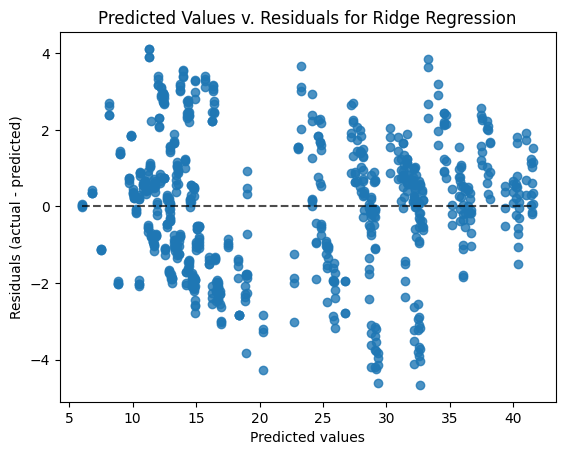

In [827]:
y_pred = ridge.predict(poly_df)

display = PredictionErrorDisplay.from_predictions(y_pred=y_pred, y_true=y)
plt.title("Predicted Values v. Residuals for Ridge Regression")

#### Making Prediction

In [822]:
best_models.loc[6, "features_used"]

['RelCompactness',
 'SurfaceArea',
 'WallArea',
 'OverallHgt',
 'GlazingArea',
 'GlazingAreaDist']

In [ ]:
predict = pd.DataFrame({"RelCompactness":0.75, "SurfaceArea": 673, "WallArea": 318, "OverallHgt": 5.25, 
            "GlazingArea": 0.25, "GlazingAreaDist": 3
            },
            index=[1])



poly = PolynomialFeatures(degree=2)

predict_poly = poly.fit_transform(predict)
poly_feature_names = poly.get_feature_names_out(predict.columns)

poly_predict = pd.DataFrame(predict_poly, columns=poly_feature_names) 

y_hat = ridge.predict(predict_poly)

print("Predicted Value:" y_hat)

c:\Users\aurel\Project2DTSC2301\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([32.33478231])